# GRIP by The Sparks Foundation
## Data Science and Business Analytics Intern
### Task 4: Exploratory Data Analysis - Terrorism
### Dataset: 'Global Terrorism'
### Author: Saideep Priyadarshan

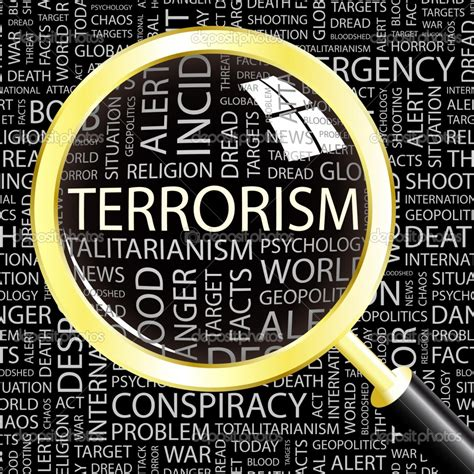

### Importing Libraries & Loading Datasets

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [80]:
df.shape

(181691, 135)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Data Preprocessing

In [82]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [83]:
df['scite1'] = df['scite1'].fillna(' ')
df['scite2'] = df['scite2'].fillna(' ')
df['scite3'] = df['scite3'].fillna(' ')
df['Headline'] = df['scite1'].astype(str) + ' ' + df['scite2'] + ' ' + df['scite3']
df['Headline']

0                                                          
1                                                          
2                                                          
3                                                          
4                                                          
                                ...                        
181686    "Somalia: Al-Shabaab Militants Attack Army Che...
181687    "Putin's 'victory' in Syria has turned into a ...
181688    "Maguindanao clashes trap tribe members," Phil...
181689    "Trader escapes grenade attack in Imphal," Bus...
181690    "Security tightened in Cotabato following IED ...
Name: Headline, Length: 181691, dtype: object

In [84]:
df = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'success', 'nkill', 'Headline']]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,success,nkill,Headline
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1,1.0,
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,1,0.0,
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1,1.0,
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,1,NaN,
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,1,NaN,


In [85]:
df = df.rename(columns = {'iyear': 'Year', 'imonth' : 'Month', 'iday' : 'Day', 'country_txt': 'Country', 'region_txt':'Region', 'provstate' : 'State',
         'city' : 'City', 'attacktype1_txt' : 'Attack_type', 'targtype1_txt' : 'Target', 'gname' : 'Gang', 'weaptype1_txt' : 'Weapon'
         , 'success' : 'Success', 'nkill' : 'Kill'})
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target,Gang,Weapon,Success,Kill,Headline
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1,1.0,
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,1,0.0,
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1,1.0,
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,1,NaN,
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,1,NaN,


### Identifying the Missing Values

In [86]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
Attack_type        0
Target             0
Gang               0
Weapon             0
Success            0
Kill           10313
Headline           0
dtype: int64

In [87]:
df['State'] = df['State'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')
df['Kill'] = df['Kill'].fillna('0')

In [88]:
df['Kill'] = df['Kill'].astype(int)
df.describe()

,Year,Month,Day,Success,Kill
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.889598,2.266860
std,13.259430,3.388303,8.814045,0.313391,11.227057
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1570.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         181691 non-null  int64 
 1   Month        181691 non-null  int64 
 2   Day          181691 non-null  int64 
 3   Country      181691 non-null  object
 4   Region       181691 non-null  object
 5   State        181691 non-null  object
 6   City         181691 non-null  object
 7   Attack_type  181691 non-null  object
 8   Target       181691 non-null  object
 9   Gang         181691 non-null  object
 10  Weapon       181691 non-null  object
 11  Success      181691 non-null  int64 
 12  Kill         181691 non-null  int32 
 13  Headline     181691 non-null  object
dtypes: int32(1), int64(4), object(9)
memory usage: 18.7+ MB


### Getting Insights from Data

In [90]:
df['Country'].nunique()

205

In [91]:
df['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [92]:
df['Attack_type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [93]:
df['Target'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [94]:
df['Gang'].nunique()

3537

In [95]:
df['Weapon'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [96]:
df['Country'].value_counts().head(20)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [97]:
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [98]:
df['State'].value_counts().head(20)

Baghdad                                7645
Unknown                                4711
Northern Ireland                       4498
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Name: State, dtype: int64

In [99]:
df['Target'].value_counts().head(20)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Name: Target, dtype: int64

In [100]:
df['City'].value_counts().head(20)

Unknown           10209
Baghdad            7589
Karachi            2652
Lima               2359
Mosul              2265
Belfast            2171
Santiago           1621
Mogadishu          1581
San Salvador       1558
Istanbul           1048
Athens             1019
Bogota              984
Kirkuk              925
Beirut              918
Medellin            848
Benghazi            840
Peshawar            819
Quetta              803
Guatemala City      755
Baqubah             745
Name: City, dtype: int64

In [101]:
df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [102]:
df['Gang'].value_counts().head(20)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

In [103]:
df['Weapon'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

### Data Visualisation

<AxesSubplot:title={'center':'Attack by Year'}, xlabel='Year', ylabel='count'>

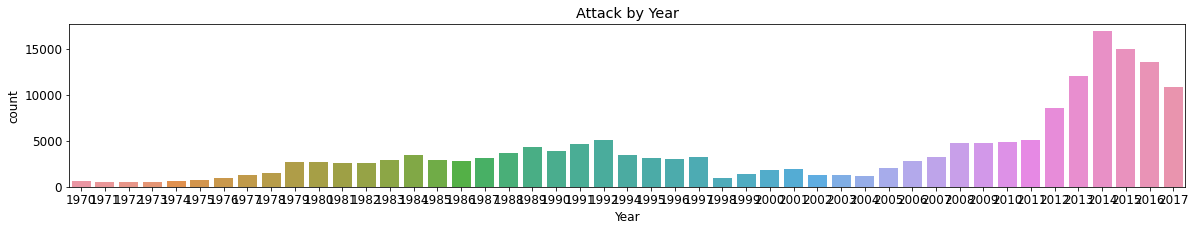

In [104]:
plt.figure(figsize = (20,3))
plt.title('Attack by Year')
sns.countplot(x = df.Year)

<AxesSubplot:title={'center':'Attack by Month'}, xlabel='Month', ylabel='count'>

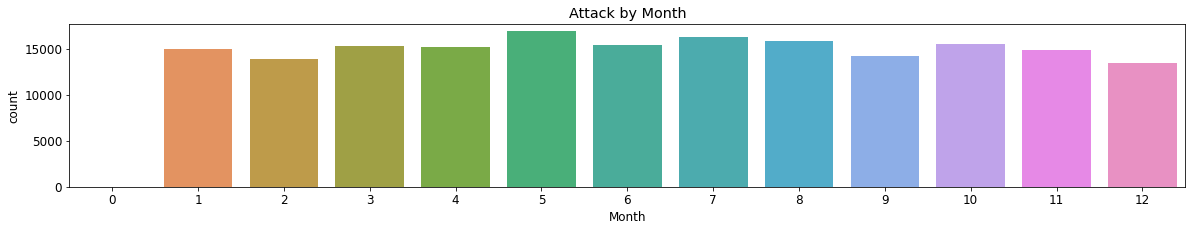

In [105]:
plt.figure(figsize = (20,3))
plt.title('Attack by Month')
sns.countplot(x = df.Month)

<AxesSubplot:title={'center':'Attack by Day'}, xlabel='Day', ylabel='count'>

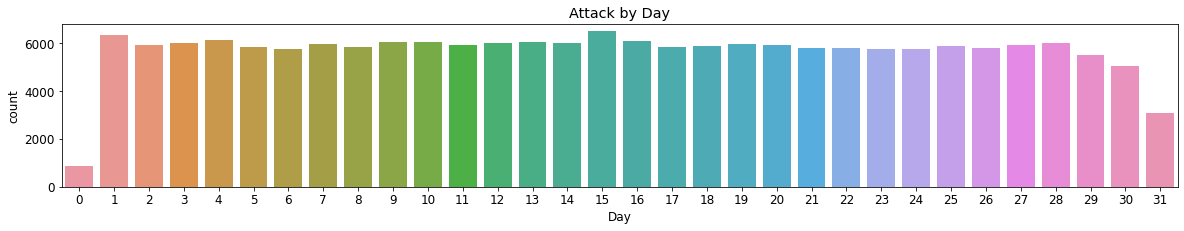

In [106]:
plt.figure(figsize = (20,3))
plt.title('Attack by Day')
sns.countplot(x = df.Day)

Text(0.5, 1.0, 'Top 10 Countries in terms of terrorists activities')

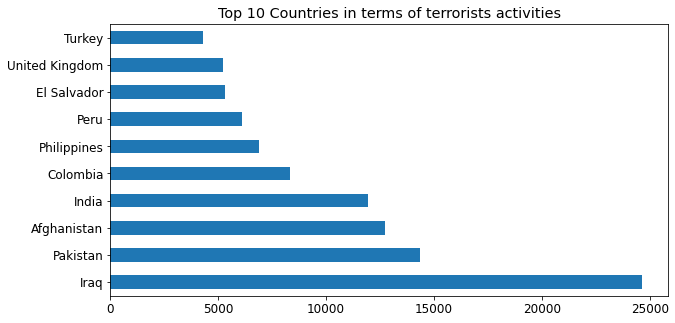

In [107]:
df['Country'].value_counts().head(10).plot(kind='barh',figsize=[10,5])
plt.title('Top 10 Countries in terms of terrorists activities')

<AxesSubplot:title={'center':'Attack by Region'}, xlabel='Region', ylabel='count'>

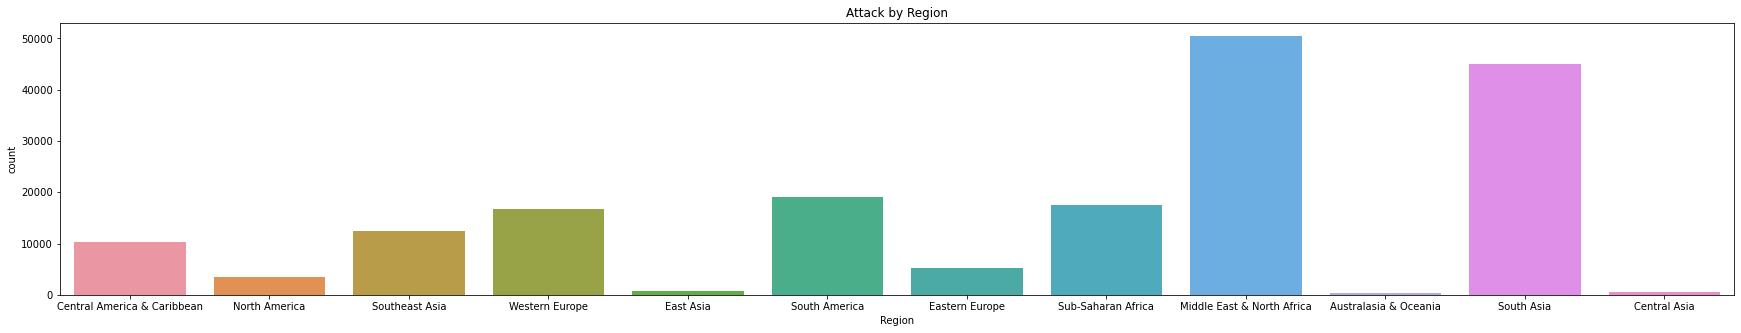

In [108]:
plt.figure(figsize = (30,5))
plt.rcParams.update({'font.size':10})
plt.title('Attack by Region')
sns.countplot(x = df.Region)

Text(0.5, 1.0, 'Top 10 Cities in terms of terrorists attacks')

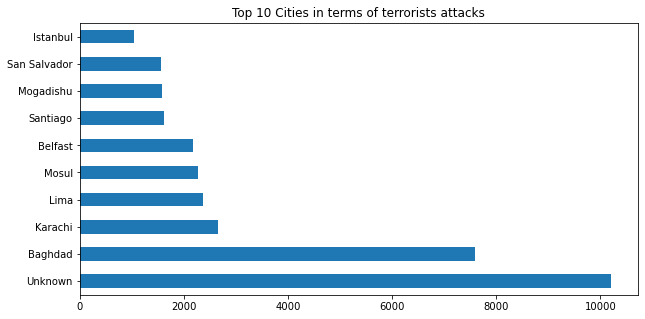

In [109]:
df['City'].value_counts().head(10).plot(kind='barh',figsize=[10,5])
plt.title('Top 10 Cities in terms of terrorists attacks')

Text(0.5, 1.0, 'Weapon Used')

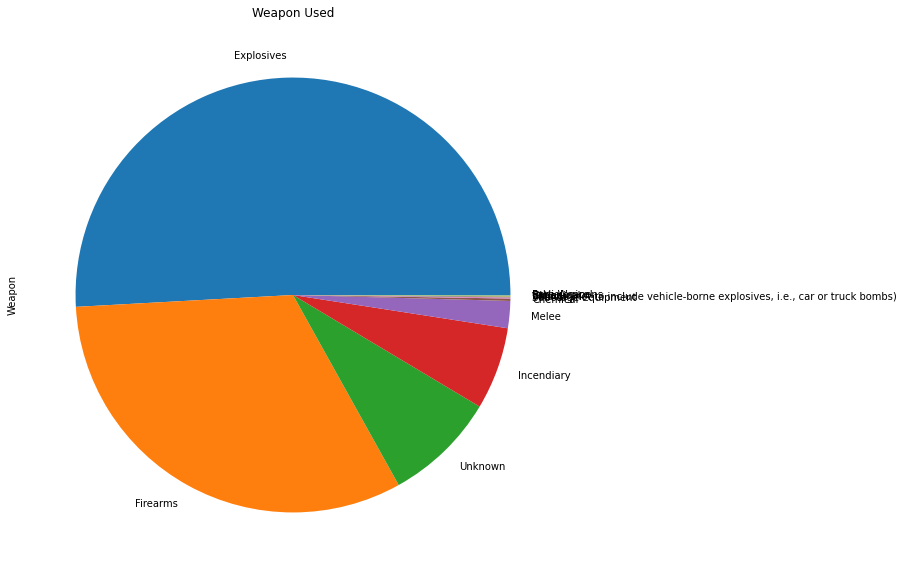

In [110]:
df['Weapon'].value_counts().plot(kind = 'pie', figsize = [10,10])
plt.title("Weapon Used")

Text(0.5, 1.0, 'Targets')

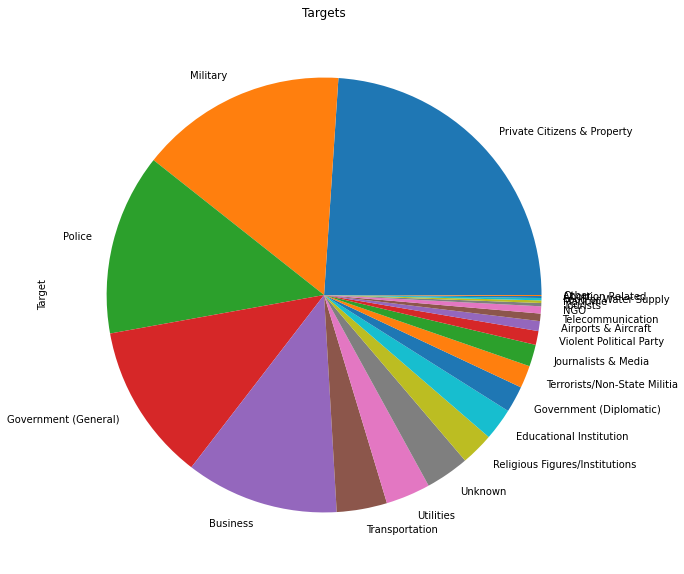

In [111]:
df['Target'].value_counts().plot(kind = 'pie', figsize = [10,10])
plt.title('Targets')

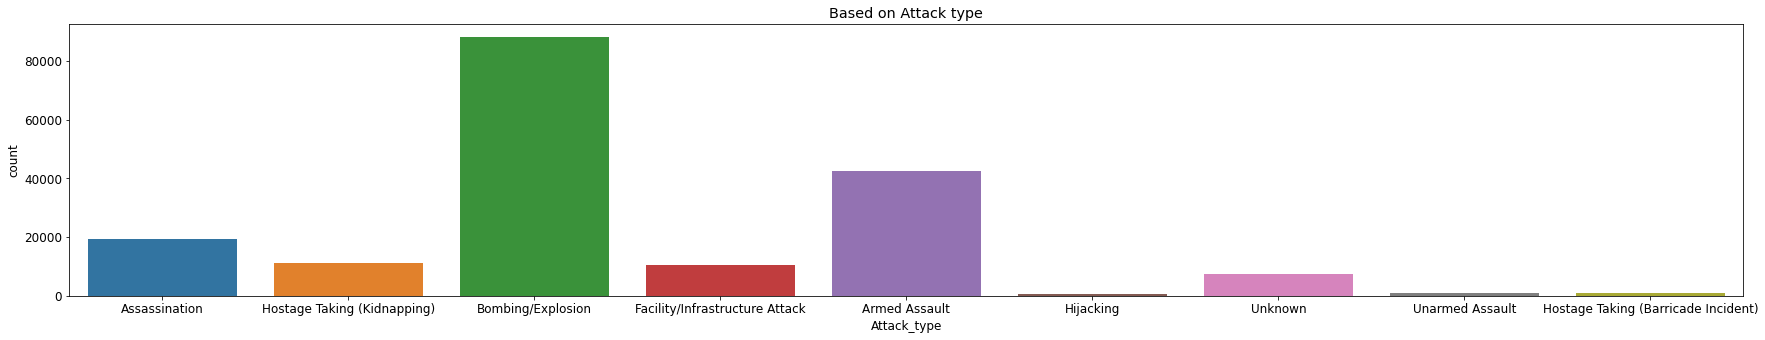

In [112]:
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=df.Attack_type);

Text(0.5, 1.0, 'No. of attacks by Terrorist Groups')

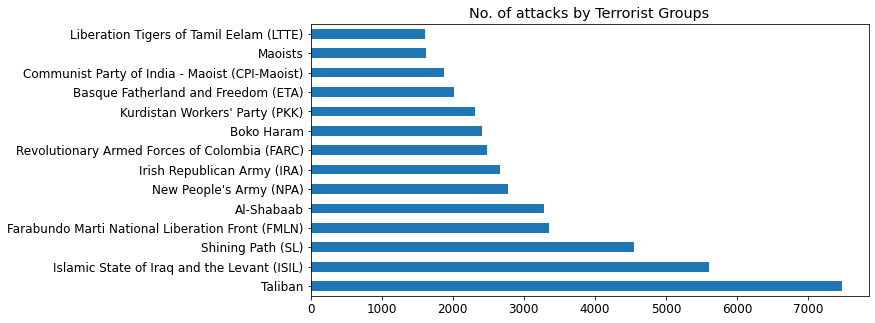

In [113]:
df['Gang'].value_counts()[1:15].head(15).plot(kind = 'barh', figsize =[10,5])
plt.title('No. of attacks by Terrorist Groups')

Text(0.5, 1.0, 'Successfull terrorist operations')

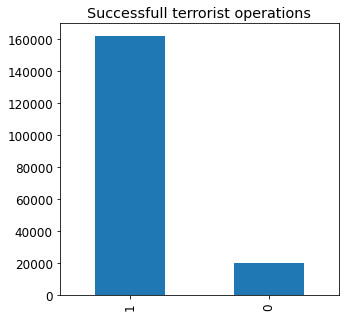

In [114]:
df['Success'].value_counts().plot(kind='bar',figsize=[5,5])
plt.title("Successfull terrorist operations")

Text(0.5, 1.0, 'Region Vs. Weapon')

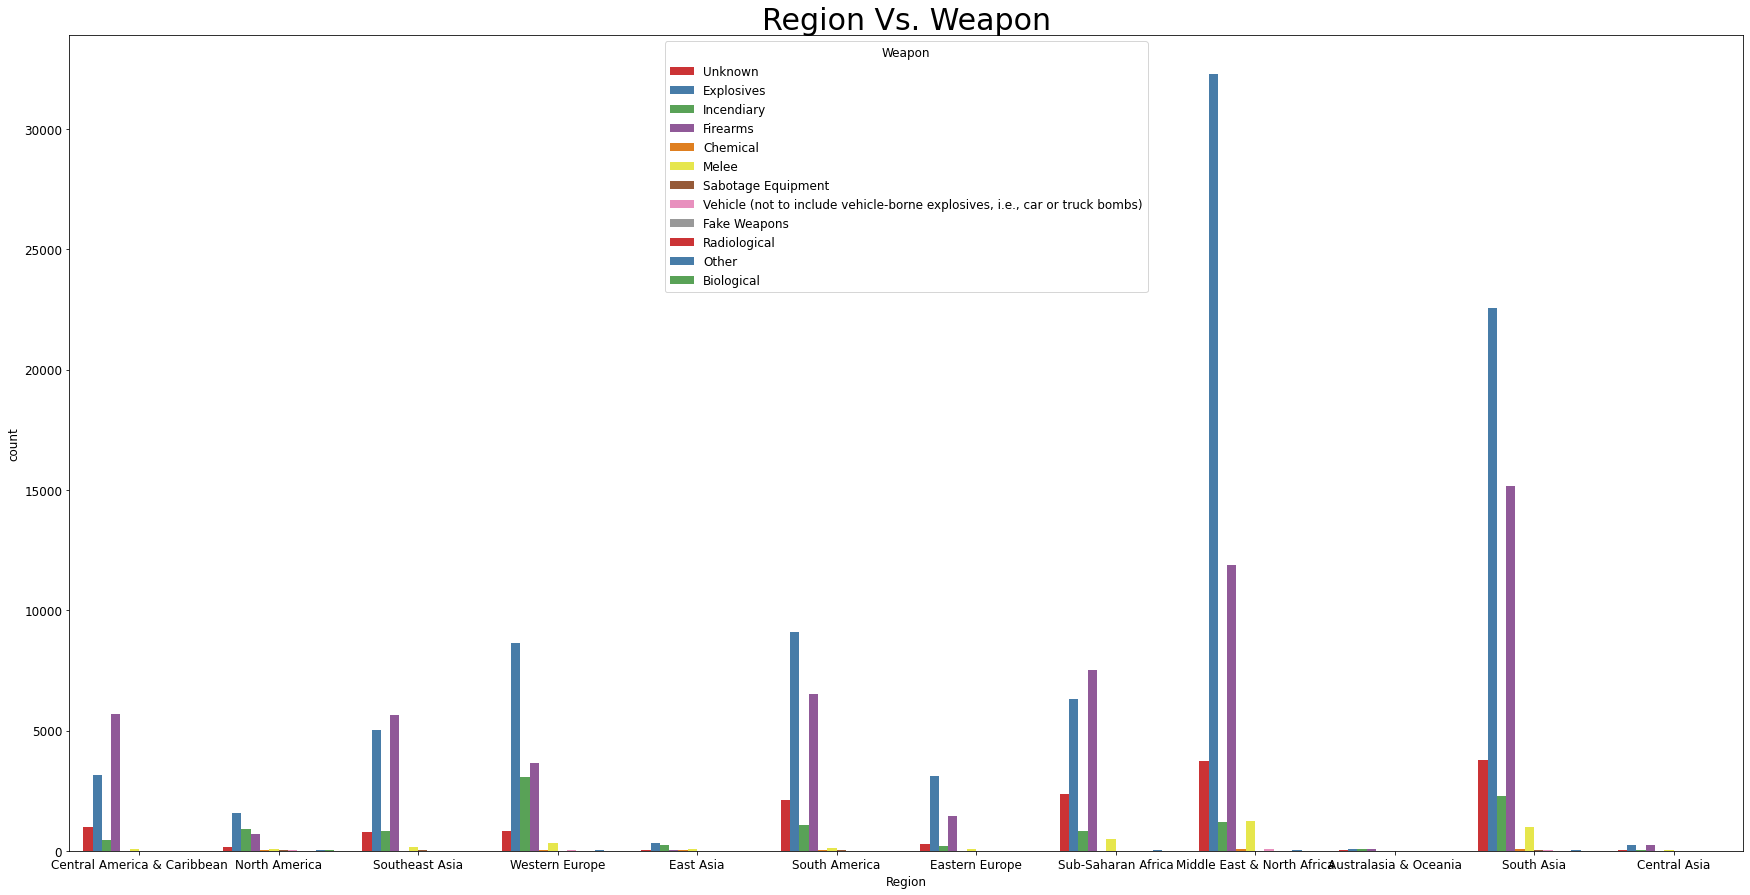

In [115]:
plt.subplots(figsize = (30,15))
sns.countplot(x="Region", hue ='Weapon', data = df,palette = "Set1")
plt.title('Region Vs. Weapon', fontsize = 30)

Text(0.5, 1.0, 'Top 10 Groups Trend')

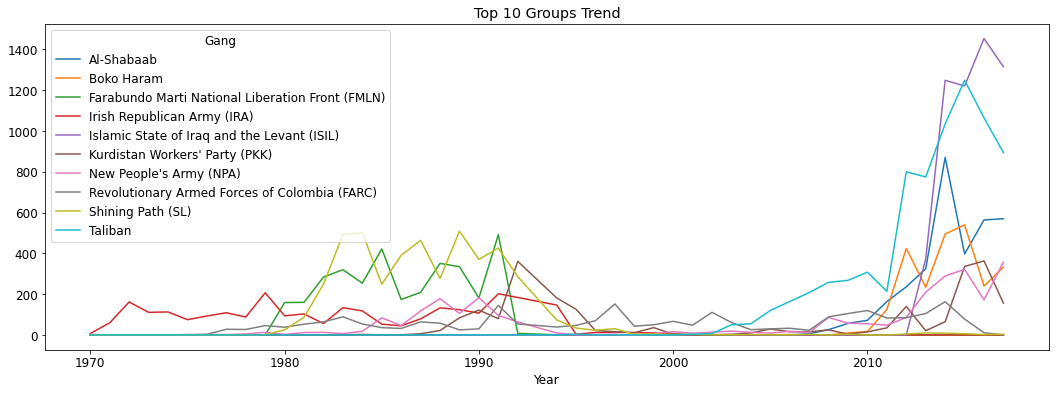

In [116]:
top10 = df[df['Gang'].isin(df['Gang'].value_counts()[1:11].index)]
pd.crosstab(top10.Year, top10.Gang).plot(color=sns.color_palette())
plt.gcf().set_size_inches(18,6)
plt.title("Top 10 Groups Trend")

## Conclusion
1. The number of terrorist attacks increased from *1970* to *2014* and then decreased. The maximum number of terrorist attacks happened in *2014*.

2. the Maximum number of terrorist attacks till now happens in *Iraq*, followed by *Pakistan*, *Afghanistan*, and *India*.

3. In terms of Region, the *Middle East* and *North African* regions most suffered from terror attacks.

4. Regarding the city, *Baghdad* suffers the most significant number of terror attacks, followed by *Karachi*.

5. About *50%+* terrorist attacks happen by the use of *Explosives*.

6. *Taliban* is involved in the most terror attacks, followed by *ISIL*.